# Cluster 1: Profit and Loss vs. Times Chosen per Choice

This cluster aims to spot a trend/correlation between the total net profit/loss made by each subject for each choice option and the proportion of times they chose that option.

Each subject will have the total profits/losses for choice 1, 2, 3 and 4, meaning there are 2468 [number of subjects=617] x [4 choices] datapoints in the graph.

## Importing Relevant Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from functions import *

In [2]:
choice_95 = pd.DataFrame(pd.read_csv('../data/choice_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('../data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('../data/lo_95.csv'))

choice_100 = pd.DataFrame(pd.read_csv('../data/choice_100.csv'))
win_100 = pd.DataFrame(pd.read_csv('../data/wi_100.csv'))
loss_100 = pd.DataFrame(pd.read_csv('../data/lo_100.csv'))

choice_150 = pd.DataFrame(pd.read_csv('../data/choice_150.csv'))
win_150 = pd.DataFrame(pd.read_csv('../data/wi_150.csv'))
loss_150 = pd.DataFrame(pd.read_csv('../data/lo_150.csv'))

## Assigning Variables for Net Profit/Loss and Choice Proportions and Visualising them

In [3]:
## Creating initial lists with only the 95-trial dataset
output_95 = create_net_profit_vs_count_list(choice_95, win_95, loss_95)
profit_loss_list = output_95[0]
chosen_count = output_95[1]

# Adding the 100-trial dataset to the lists
output_100 = create_net_profit_vs_count_list(choice_100, win_100, loss_100,
                                            profit_loss_list, chosen_count)
profit_loss_list = output_100[0]
chosen_count = output_100[1]

# Adding the 150-trial dataset and having our final list
output_150 = create_net_profit_vs_count_list(choice_150, win_150, loss_150,
                                            profit_loss_list, chosen_count)
profit_loss_list = output_150[0]
chosen_count = output_150[1]

In [4]:
tmp_list = []
for subject in range(0,len(profit_loss_list)):
    for choice in range(0,4):
        tmp_list.append([profit_loss_list[subject][choice],chosen_count[subject][choice]])
cluster_array = np.array(tmp_list)

The above code snippet is used to arrange the data into arrays, to be passed to clustering algorithms at a later stage.

The graph below shows the scatterplot for the proportion of times each choice was picked by a subject and the net profit or loss the same subject made with that choice in total.

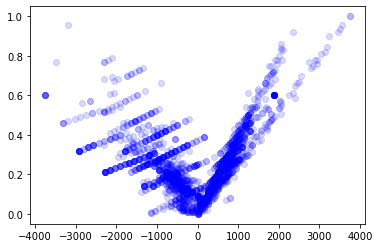

In [5]:
plt.scatter(
   cluster_array[:, 0], cluster_array[:, 1],
   c='blue', alpha = 0.15
)

## Creating 4 Clusters using the K-Means Algorithm

In [6]:
kmeans = KMeans(
    n_clusters=4, init='random',
    n_init=1, 
    tol=1e-04, random_state=2
)

y_km = kmeans.fit_predict(cluster_array)

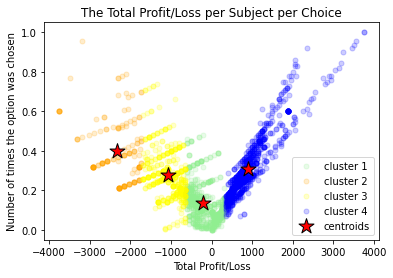

In [7]:
plt.scatter(
    cluster_array[y_km == 0, 0], cluster_array[y_km == 0, 1],
    s=25, c='lightgreen',
    marker='o', alpha = 0.2,
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km == 1, 0], cluster_array[y_km == 1, 1],
    s=25, c='orange',
    marker='o', alpha = 0.2,
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km == 2, 0], cluster_array[y_km == 2, 1],
    s=25, c='yellow',
    marker='o', alpha = 0.2,
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km == 3, 0], cluster_array[y_km == 3, 1],
    s=25, c='blue',
    marker='o', alpha = 0.2,
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

## Creating 4 Clusters using the K-Means Algorithm (where maximum iterations is 300)

In [8]:
kmeans2 = KMeans(
    n_clusters=4, init='random',
    n_init=1, max_iter = 300,
)

y_km2 = kmeans2.fit_predict(cluster_array)

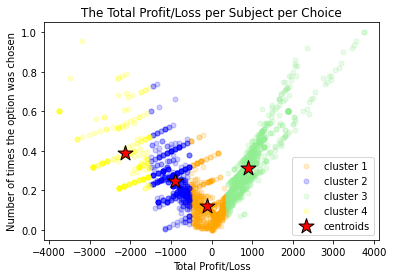

In [9]:
# plot the 4 clusters
plt.scatter(
    cluster_array[y_km2 == 0, 0], cluster_array[y_km2 == 0, 1],
    s=25, c='orange',
    marker='o', alpha = 0.2,
    label='cluster 1'
)

plt.scatter(
    cluster_array[y_km2 == 1, 0], cluster_array[y_km2 == 1, 1],
    s=25, c='blue',
    marker='o', alpha = 0.2,
    label='cluster 2'
)

plt.scatter(
    cluster_array[y_km2 == 2, 0], cluster_array[y_km2 == 2, 1],
    s=25, c='lightgreen',
    marker='o', alpha = 0.2,
    label='cluster 3'
)

plt.scatter(
    cluster_array[y_km2 == 3, 0], cluster_array[y_km2 == 3, 1],
    s=25, c='yellow',
    marker='o', alpha = 0.2,
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

## Comparing clustering algorithm to the original choices

In [10]:
option = [1,2,3,4]*(len(profit_loss_list))
option_array = np.array(option)

In [11]:
option_array

array([1, 2, 3, ..., 2, 3, 4])

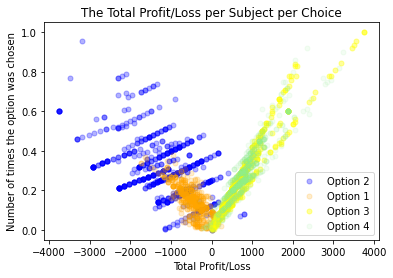

In [12]:
plt.scatter(
    cluster_array[option_array == 2, 0], cluster_array[option_array == 2, 1],
    s=25, alpha=0.3, c='blue',
    marker='o',
    label='Option 2'
)

plt.scatter(
    cluster_array[option_array == 1, 0], cluster_array[option_array == 1, 1],
    s=25, alpha=0.2, c='orange',
    marker='o',
    label='Option 1'
)

plt.scatter(
    cluster_array[option_array == 3, 0], cluster_array[option_array == 3, 1],
    s=25, alpha=0.4, c='yellow',
    marker='o',
    label='Option 3'
)

plt.scatter(
    cluster_array[option_array == 4, 0], cluster_array[option_array == 4, 1],
    s=25, alpha=0.1, c='lightgreen',
    marker='o',
    label='Option 4'
)

plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)